# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [ ]:
# Insurance Claim Analysis: Demographic and Health
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance_data.csv')

In [ ]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
# df.drop('index', axis=1, inplace=True)
df.drop(columns=['index', 'PatientID'], inplace=True)

In [ ]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['region'].fillna(df['region'].mode()[0], inplace=True) # south

<ipython-input-5-eeae1d3711dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-5-eeae1d3711dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df['region'].value_counts()

,count
region,
southeast,446
northwest,349
southwest,314
northeast,231


In [ ]:
# df['children'].value_counts() # value_counts() only applicable for Series
# df[df['children'] == 0]['diabetic'].value_counts()
# pd.crosstab(df['children'], df['diabetic'], df['smoker'] , margins=True)
# pd.crosstab(index=[df['children'], df['smoker'], df['bmi_types'], df['diabetic']], columns=df['region'])
# df.groupby(['children', 'smoker', 'diabetic', 'bmi_types']).size().unstack(fill_value=0)

In [ ]:
# Column types:
#     1. numerical - age, bmi,bloodpressure, children(5), claim
#     2. categorical - gender(2), diabetic(2),smoker(2), region(4), bmi_types(4)

#### Column name	Description
* Diabetic	- Whether the insured person is diabetic or not. (Boolean)
* Children -	Number of children of the insured person. (Integer)
* Smoker - Whether the insured person is a smoker or not. (Boolean)
* Claim	 - Amount of the insurance claim. (Float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
 9   bmi_types      1340 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 104.8+ KB


In [ ]:
df.describe()

,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.668955,94.157463,1.093284,13252.745642
std,11.082175,6.106735,11.434712,1.205334,12109.609288
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,47.000000,34.700000,99.000000,2.000000,16604.305000
max,60.000000,53.100000,140.000000,5.000000,63770.430000


### Univariate Analysis

In [ ]:
def bmi_cate(n):
    if not isinstance(n, (int, float)): return 'Invalid input'   # Check if input is a number
    if n < 18.5: return 'Underweight'
    elif 18.5 <= n < 25: return 'Normal Weight'
    elif 25 <= n < 30: return 'Overweight'
    else: return 'Obese'

df['bmi_types'] = df['bmi'].apply(bmi_cate)

In [ ]:
df['bmi_types'].value_counts()

,count
bmi_types,
Obese,708
Overweight,389
Normal Weight,223
Underweight,20


<Axes: xlabel='bmi_types', ylabel='Count'>

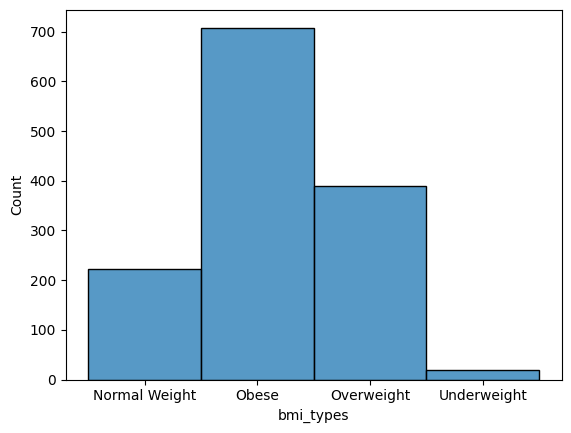

In [ ]:
sns.histplot(df, x='bmi_types')

<Axes: ylabel='count'>

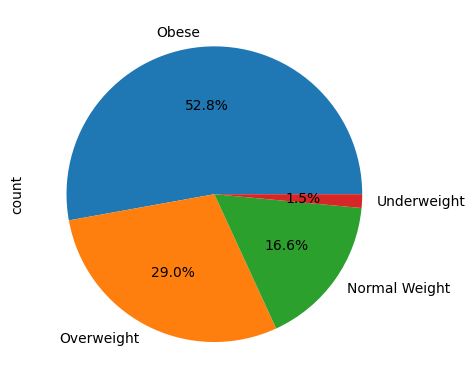

In [ ]:
df['bmi_types'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='bmi_types', ylabel='claim'>

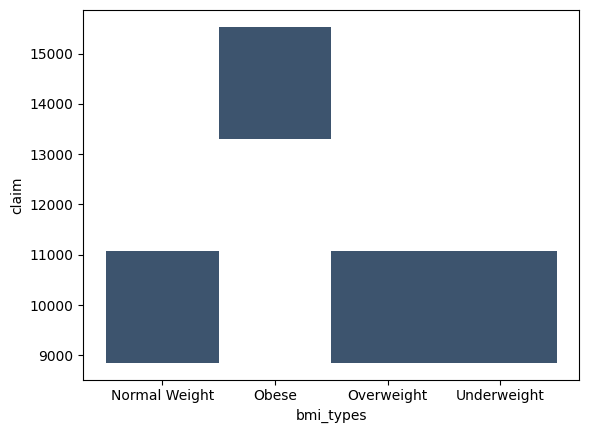

In [ ]:
sns.histplot(data=df.groupby('bmi_types')['claim'].mean().reset_index(),x='bmi_types', y='claim')

In [ ]:
df['claim'].describe()

,claim
count,1340.000000
mean,13252.745642
std,12109.609288
min,1121.870000
25%,4719.685000
50%,9369.615000
75%,16604.305000
max,63770.430000


<Axes: xlabel='bmi_types', ylabel='claim'>

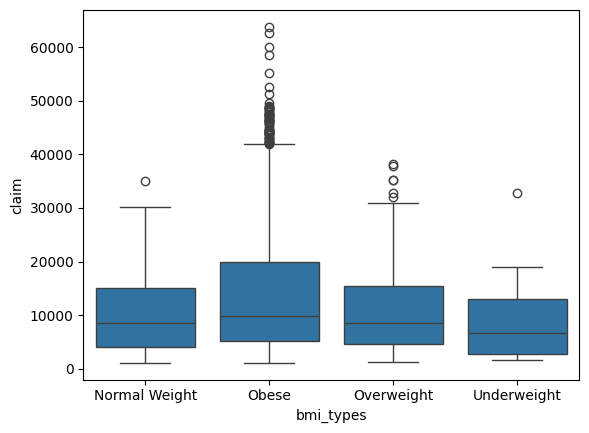

In [ ]:
sns.boxplot(data=df, x='bmi_types', y='claim')

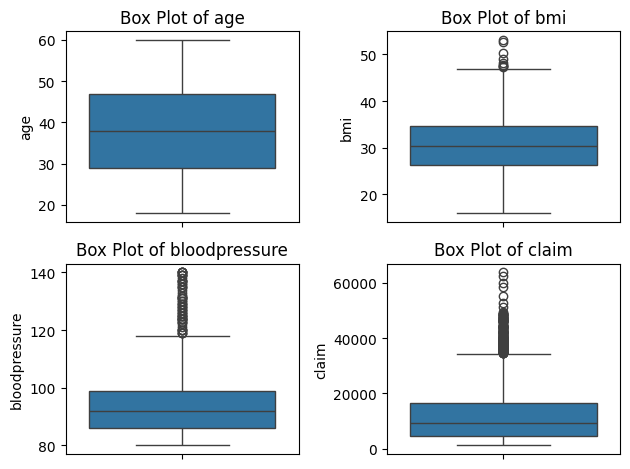

In [ ]:
for i, column in enumerate(['age', 'bmi', 'bloodpressure', 'claim'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

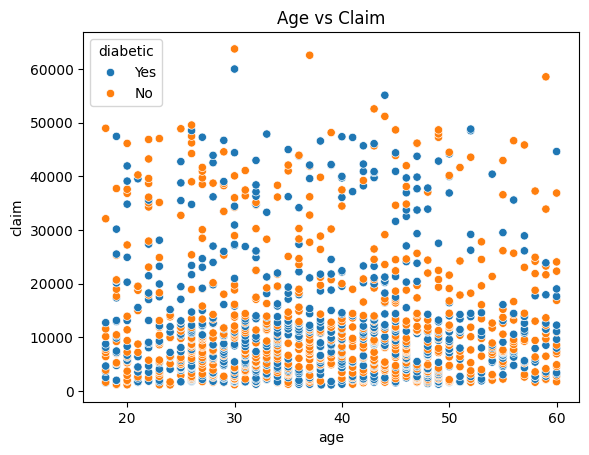

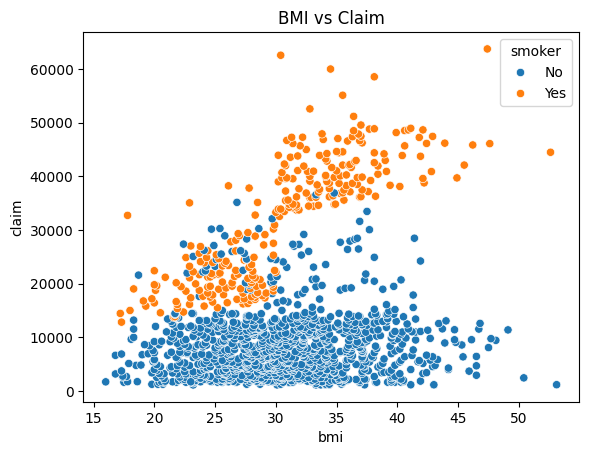

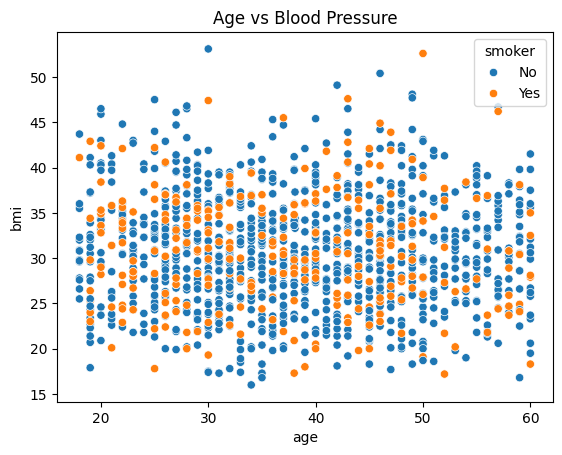

In [ ]:
sns.scatterplot(data=df, x='age', y='claim', hue='diabetic')
plt.title('Age vs Claim')
plt.show()

sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker')
plt.title('BMI vs Claim')
plt.show()

sns.scatterplot(data=df, x="age", y="bmi", hue="smoker")
plt.title("Age vs Blood Pressure")
plt.show()

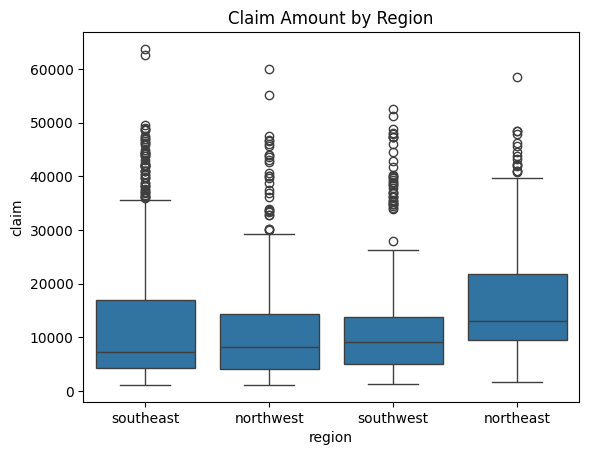

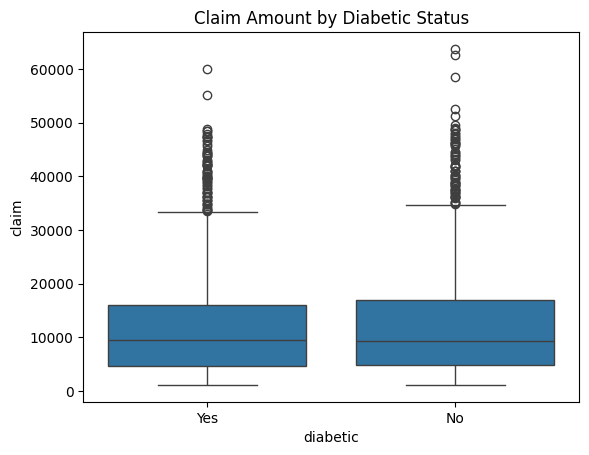

In [ ]:
# plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='claim')
plt.title('Claim Amount by Region')
plt.show()

# Box plots for claims by diabetic status
# plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='diabetic', y='claim')
plt.title('Claim Amount by Diabetic Status')
plt.show()

In [ ]:
df.groupby('bmi_types')['age'].agg(['mean', 'median', ]).reset_index().sort_values(by='mean', ascending=False)

,bmi_types,mean,median
2,Overweight,39.074550,39.0
3,Underweight,38.500000,35.0
0,Normal Weight,38.017937,37.0
1,Obese,37.538691,37.0


In [ ]:
import numpy as np
def blood_pressure_category(value):
    if pd.isna(value):
        return np.nan

    if value < 120:
        return "normal"
    elif 120 <= value < 130:
        return "elevated"
    elif 130 <= value < 140:
        return "hbp-stage1"
    elif 140 <= value < 180:
        return "hbp-stage2"
    elif value >= 180:
        return "hypertensive_crisis"
    else:
        return "Invalid Value"

df['bloodpressure_category'] = df['bloodpressure'].apply(blood_pressure_category)

In [ ]:
df['bloodpressure_category'].value_counts()

,count
bloodpressure_category,
normal,1281
elevated,30
hbp-stage1,24
hbp-stage2,5


In [ ]:
df.groupby(['bloodpressure_category', 'gender'])['claim'].mean().reset_index().sort_values(by='claim', ascending=False)

,bloodpressure_category,gender,claim
1,elevated,male,39143.287368
5,hbp-stage2,male,38731.746667
0,elevated,female,38236.110909
4,hbp-stage2,female,37711.120000
2,hbp-stage1,female,37619.171538
3,hbp-stage1,male,36273.980909
7,normal,male,12680.134016
6,normal,female,11534.579465


In [ ]:
df.pivot_table(index='bloodpressure_category', columns='gender', values=['age','claim'], aggfunc='mean')

age                    claim              
gender                     female       male        female          male
bloodpressure_category                                                  
elevated                45.636364  33.105263  38236.110909  39143.287368
hbp-stage1              41.230769  34.181818  37619.171538  36273.980909
hbp-stage2              38.500000  39.333333  37711.120000  38731.746667
normal                  42.466981  33.764951  11534.579465  12680.134016

In [ ]:
# df['age'].describe()

In [ ]:
# df[df['age'] == 60]['bloodpressure_category']

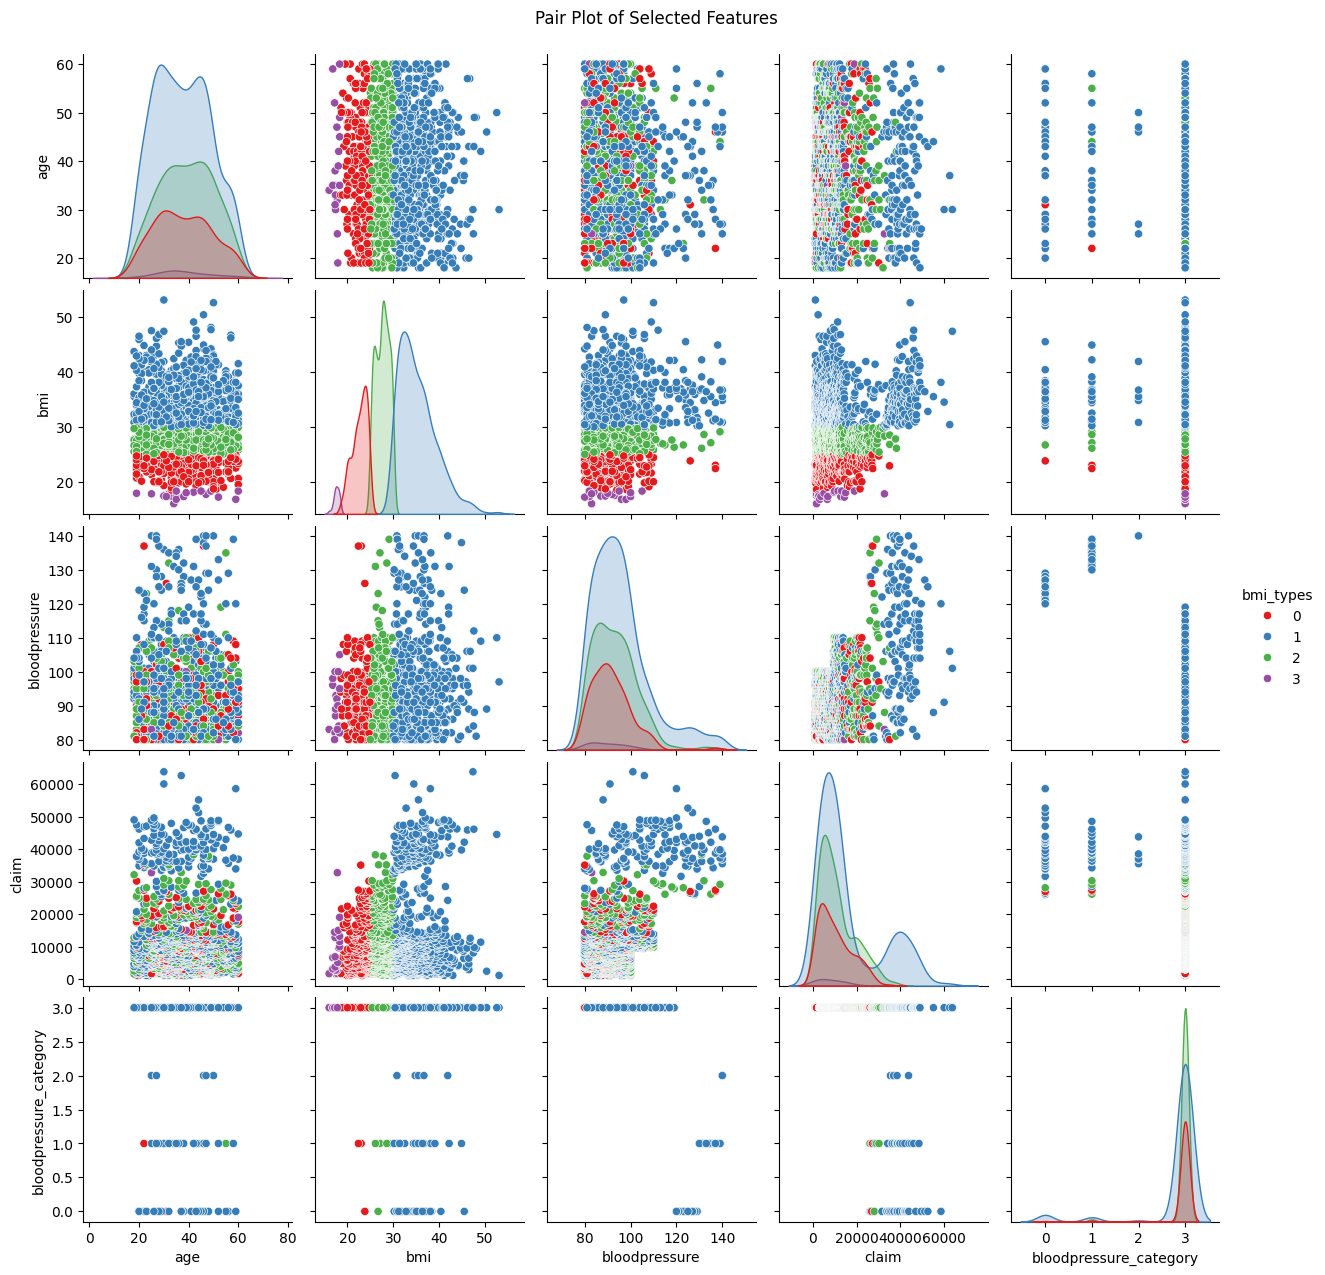

In [ ]:
columns_to_plot = ['age', 'bmi', 'bloodpressure', 'claim', 'bmi_types', 'bloodpressure_category']

df['bmi_types'] = df['bmi_types'].astype('category').cat.codes
df['bloodpressure_category'] = df['bloodpressure_category'].astype('category').cat.codes
sns.pairplot(df[columns_to_plot], hue='bmi_types', palette='Set1')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

### conclusion:
1. **Age and Claim:** There seems to be a positive correlation between age and claim amounts. As age increases, claim amounts also tend to rise, indicating that older individuals may have higher healthcare costs.

2. **BMI and Claim:** The relationship between BMI and claims shows that individuals classified as Obese (bmi_types = 2) have higher claim amounts. The density plots suggest that those with a higher BMI generally incur more claims.

3. **Blood Pressure and Claim:** Similar to BMI, individuals with higher blood pressure readings also tend to have higher claim amounts. This trend suggests that blood pressure is a significant factor in determining healthcare costs.

4. **Categorical Variables:** The use of color coding for bmi_types (0: Normal Weight, 1: Overweight, 2: Obese, 3: Underweight) allows for easy differentiation between groups. You can see distinct clusters based on these categories, particularly in the scatter plots between BMI and claims.

5. **Blood Pressure Categories:** While blood pressure is numeric, understanding how it relates to bmi_types provides insight into health risks. Those in the Hypertension categories may be at higher risk for higher claims.

6. **Outliers:** Outliers are evident, especially in the claim variable, where some individuals have extraordinarily high claims, possibly skewing the overall data analysis.